In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# np.save('optimal_solution.npy',optimal_solution, allow_pickle=True)
# np.save('optimal_solution.npy',tmp, allow_pickle=True)
# tempNumpyArray=np.load('optimal_solution.npy', allow_pickle=True)

In [3]:
min_len = 2
max_len = 21
N_iter = 4000

len_prod_price = np.random.randint(min_len, max_len)
seq_prod_price = 0.2*np.random.rand() + 0.4
cprod = np.repeat(seq_prod_price, len_prod_price)

len_buy_price = np.random.randint(min_len, max_len)
seq_buy_price = 0.3*np.random.rand() + 0.5
cbuy = np.repeat(seq_buy_price, len_buy_price)

len_sell_price = np.random.randint(min_len, max_len)
seq_sell_price = 0.2*np.random.rand() + 0.3
csell = np.repeat(seq_sell_price, len_sell_price)

for i in range(N_iter):
    len_prod_price = np.random.randint(min_len, max_len)
    seq_prod_price = 0.3*np.random.rand() + 0.4
    tmp_prod = np.repeat(seq_prod_price, len_prod_price)
    
    len_buy_price = np.random.randint(min_len, max_len)
    seq_buy_price = 0.4*np.random.rand() + 0.45
    tmp_buy = np.repeat(seq_buy_price, len_buy_price)
    
    len_sell_price = np.random.randint(min_len, max_len)
    seq_sell_price = 0.2*np.random.rand() + 0.35
    tmp_sell = np.repeat(seq_sell_price, len_sell_price)
    
    cprod = np.concatenate((cprod, tmp_prod))
    cbuy = np.concatenate((cbuy, tmp_buy))
    csell = np.concatenate((csell, tmp_sell))
    
idx_min = min(cprod.shape[0], cbuy.shape[0], csell.shape[0])
cprod = cprod[:idx_min]
cbuy = cbuy[:idx_min]
csell = csell[:idx_min]

In [5]:
min(cbuy), min(csell), min(cprod)

(0.4501338380839927, 0.31227274681791445, 0.4000273296699952)

In [6]:
max(cbuy), max(csell), max(cprod)

(0.8498063477426671, 0.549987703342658, 0.6999944832429609)

In [9]:
np.sum(csell>cbuy), np.sum(cprod>cbuy), len(csell)

(2697, 11175, 43795)

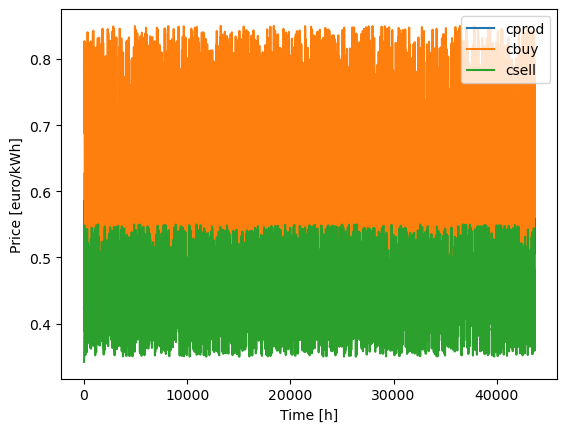

In [20]:
time_axis = np.arange(idx_min)

plt.plot(time_axis, cprod, label='cprod')
plt.plot(time_axis, cbuy, label='cbuy')
plt.plot(time_axis, csell, label='csell')
plt.legend()
plt.xlabel('Time [h]')
plt.ylabel('Price [euro/kWh]')
plt.show()

In [21]:
import csv

#imports dataset from ENTSO Transparency platforms (years 2022 and 2021)
#loads and renewable source profiles

with open('data_entso//total_load_2022.csv') as f:
    reader = csv.reader(f)
    actual_load_2022 = list(reader)
    
actual_load_2022 = np.array(actual_load_2022)
actual_load_2022[8169:8173] = actual_load_2022[8168] #repair gaps with padding
actual_load_2022 = actual_load_2022[1:,2].astype(np.float32)

with open('data_entso//renewables_forecast_2022.csv') as f:
    reader = csv.reader(f)
    renewables_forecast_2022 = list(reader)
    
renewables_forecast_2022 = np.array(renewables_forecast_2022)
renewables_forecast_2022[8169:8173, [1,4,7]] = renewables_forecast_2022[8168, [1,4,7]] #repair gaps with padding
renewables_forecast_2022 = renewables_forecast_2022[1:, [1,4,7]].astype(np.float32)

with open('data_entso//total_load_2021.csv') as f:
    reader = csv.reader(f)
    actual_load_2021 = list(reader)
    
actual_load_2021 = np.array(actual_load_2021)
actual_load_2021[8265:8269] = actual_load_2021[8264] #repair gaps with padding
actual_load_2021 = actual_load_2021[1:,2].astype(np.float32)

with open('data_entso//renewables_forecast_2021.csv') as f:
    reader = csv.reader(f)
    renewables_forecast_2021 = list(reader)
    
renewables_forecast_2021 = np.array(renewables_forecast_2021)
renewables_forecast_2021[8265:8269, [1,4,7]] = renewables_forecast_2021[8264, [1,4,7]] #repair gaps with padding
renewables_forecast_2021 = renewables_forecast_2021[1:, [1,4,7]].astype(np.float32)

#scaling and downsampling (Ts=15m to Ts=30m)
scaling_load = 20; scaling_res = 13.3

actual_load_2022 = actual_load_2022[0::2][:-2]/scaling_load
renewables_forecast_2022 = renewables_forecast_2022.sum(axis=1)[0::2][:-2]/scaling_res

actual_load_2021 = actual_load_2021[0::2][:-2]/scaling_load
renewables_forecast_2021 = renewables_forecast_2021.sum(axis=1)[0::2][:-2]/scaling_res

In [27]:
idx_max = 48*365

cbuy_2021 = cbuy[:idx_max]
csell_2021 = csell[:idx_max]
cprod_2021 = cprod[:idx_max]

cbuy_2022 = cbuy[idx_max:2*idx_max]
csell_2022 = csell[idx_max:2*idx_max]
cprod_2022 = cprod[idx_max:2*idx_max]

data_2021 = np.array([cbuy_2021, csell_2021, cprod_2021, actual_load_2021, renewables_forecast_2021], dtype=object)
data_2022 = np.array([cbuy_2022, csell_2022, cprod_2022, actual_load_2022, renewables_forecast_2022], dtype=object)
data = [data_2021, data_2022]

np.save('data_costs_loads_2021_2022.npy', data, allow_pickle=True)

# a, b = np.load('test.npy', allow_pickle=True)

In [32]:
np.min(actual_load_2022), np.max(actual_load_2022), np.min(renewables_forecast_2022), np.max(renewables_forecast_2022)

(267.5, 889.3, 1.9548872, 803.6842)

In [31]:
np.min(actual_load_2021), np.max(actual_load_2021), np.min(renewables_forecast_2021), np.max(renewables_forecast_2021)

(326.05, 867.75, 1.6541353, 644.3609)

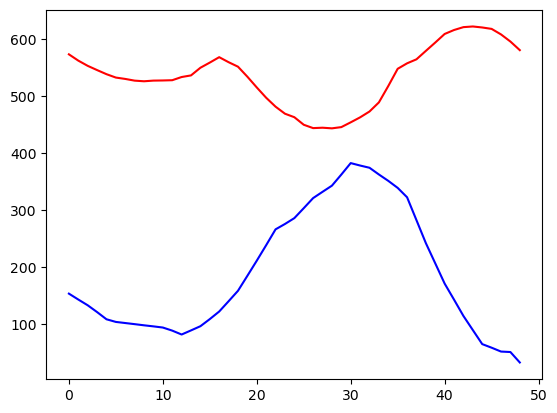

In [34]:
# idx=np.random.randint(actual_load_2022.shape[0])
idx=np.random.randint(365)

plt.plot(actual_load_2022[48*idx:48*(idx+1)+1], 'r')
plt.plot(renewables_forecast_2022[48*idx:48*(idx+1)+1], 'b')
plt.show()